In [1]:
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from scipy.stats import linregress
import string
import numpy as np
import pandas as pd
import string
import matplotlib.gridspec as gridspec
import pickle
import matplotlib.pyplot as plt
import datetime
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np
from scipy.stats import skewnorm, kstest
from scipy.stats import linregress
import string
import cartopy
from netCDF4 import Dataset
from calendar import monthrange
import cartopy.crs as ccrs
from scipy.stats import pearsonr
import pandas as pd
from importlib import reload
pd.set_option("mode.chained_assignment", None)
from scipy.stats import skewnorm, norm, lognorm
import numpy as np
from scipy.stats import lognorm, norm


In [3]:
aa_df = pd.read_excel('../data/Sea_Ice_Index_Daily_Extent_G02135_v3.0.xlsx',
                      sheet_name='SH-Daily-Extent')

aa_df.drop(columns=['Unnamed: 0',
                 'Unnamed: 1',
                 ' ',
                 '1981-2010 mean',
                 '1981-2010 median'],
        inplace=True)

aa_df[aa_df.isnull()] = np.nan

aa_df

,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,NaN,NaN,5.967,6.323,NaN,6.508,NaN,NaN,7.718,NaN,...,9.393,6.911,5.516,6.384,5.314,6.285,6.599,5.651,4.575,6.009
1,NaN,6.945,NaN,NaN,7.039,NaN,6.944,6.527,NaN,6.765,...,9.273,6.721,5.387,6.244,5.136,6.129,6.480,5.412,4.499,5.871
2,NaN,NaN,5.674,5.791,NaN,6.170,NaN,NaN,7.572,NaN,...,9.154,6.554,5.232,6.114,4.968,5.967,6.358,5.268,4.378,5.788
3,NaN,6.838,NaN,NaN,6.689,NaN,6.653,6.061,NaN,6.458,...,8.983,6.413,5.149,5.921,4.876,5.876,6.204,5.092,4.210,5.679
4,NaN,NaN,5.584,5.351,NaN,5.869,NaN,NaN,7.243,NaN,...,8.821,6.250,5.065,5.768,4.750,5.774,6.027,4.899,4.065,5.392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,7.907,NaN,NaN,8.005,NaN,7.888,8.052,NaN,7.731,NaN,...,8.358,6.156,7.146,5.989,7.011,7.441,6.631,5.677,7.062,NaN
362,NaN,6.396,7.178,NaN,6.912,NaN,NaN,8.628,NaN,NaN,...,8.098,6.038,6.998,5.833,6.878,7.208,6.404,5.509,6.809,NaN
363,7.588,NaN,NaN,7.716,NaN,7.588,7.707,NaN,7.284,NaN,...,7.791,5.873,6.829,5.704,6.735,7.121,6.278,5.144,6.554,NaN
364,NaN,6.124,6.634,NaN,6.708,NaN,NaN,8.132,NaN,NaN,...,7.494,5.787,6.684,5.599,6.624,6.984,5.970,4.947,6.346,NaN


In [4]:
ao_df = pd.read_excel('../data/Sea_Ice_Index_Daily_Extent_G02135_v3.0.xlsx',
                      sheet_name='NH-Daily-Extent')

# ao_df.drop(index=59,inplace=True)
ao_df.drop(columns=['Unnamed: 0',
                 'Unnamed: 1',
                 ' ',
                 '1981-2010 mean',
                 '1981-2010 median'],
        inplace=True)

ao_df[ao_df.isnull()] = np.nan

ao_df

,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,NaN,NaN,14.200,14.256,NaN,14.253,NaN,NaN,14.036,NaN,...,13.073,12.721,12.643,12.484,12.934,13.046,12.711,13.291,12.734,13.206
1,NaN,14.997,NaN,NaN,14.479,NaN,14.103,14.045,NaN,14.305,...,13.125,12.806,12.644,12.600,12.992,13.072,12.710,13.392,12.724,13.300
2,NaN,NaN,14.302,14.456,NaN,14.306,NaN,NaN,14.292,NaN,...,13.112,12.790,12.713,12.634,12.980,13.170,12.799,13.354,12.717,13.429
3,NaN,14.922,NaN,NaN,14.642,NaN,14.237,14.240,NaN,14.417,...,13.051,12.829,12.954,12.724,13.045,13.193,12.834,13.440,12.786,13.449
4,NaN,NaN,14.414,14.435,NaN,14.494,NaN,NaN,14.489,NaN,...,13.115,12.874,12.956,12.834,13.147,13.166,12.862,13.496,12.841,13.590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,14.383,NaN,NaN,13.953,NaN,13.664,13.394,NaN,13.766,NaN,...,12.680,12.291,12.291,12.325,12.721,12.579,12.950,12.492,12.944,NaN
362,NaN,14.101,14.172,NaN,14.144,NaN,NaN,13.571,NaN,NaN,...,12.745,12.484,12.235,12.344,12.712,12.582,12.976,12.520,12.921,NaN
363,14.500,NaN,NaN,14.128,NaN,13.855,13.494,NaN,13.904,NaN,...,12.762,12.525,12.223,12.523,12.780,12.608,12.990,12.585,13.044,NaN
364,NaN,14.092,14.093,NaN,14.159,NaN,NaN,13.701,NaN,NaN,...,12.800,12.617,12.273,12.569,12.858,12.622,13.090,12.575,13.121,NaN


In [5]:
aa_timeseries = []
ao_timeseries = []
tot_ts = []

for col in aa_df.columns[:]:
    
    aa_timeseries += list(aa_df[col])
    ao_timeseries += list(ao_df[col])
    
    tot_ts += list( np.array(aa_df[col]) + np.array(ao_df[col])    )
    
aa_timeseries = np.array(aa_timeseries)
aa_timeseries[np.isnan(aa_timeseries)] = np.nan
aa_x = np.arange(len(aa_timeseries))[~np.isnan(aa_timeseries)]
aa_y = aa_timeseries[~np.isnan(aa_timeseries)]

ao_timeseries = np.array(ao_timeseries)
ao_timeseries[np.isnan(ao_timeseries)] = np.nan
ao_x = np.arange(len(ao_timeseries))[~np.isnan(ao_timeseries)]
ao_y = ao_timeseries[~np.isnan(ao_timeseries)]

tot_ts = np.array(tot_ts)
tot_ts[np.isnan(tot_ts)] = np.nan
tot_x = np.arange(len(tot_ts))[~np.isnan(tot_ts)]
tot_y = tot_ts[~np.isnan(tot_ts)]
this_year = 2024

In [6]:
aa_mins = []
aa_maxs = []
aa_min_dates = []
aa_max_dates = []

for col in aa_df.columns:
    
    aa_mins.append(np.min(aa_df[col]))
    aa_maxs.append(np.max(aa_df[col]))
    
    aa_min_doy = np.nanargmin(aa_df[col])
    aa_min_dates.append( datetime.date(col,month=1,day=1) + datetime.timedelta(days=int(aa_min_doy)) )
    
    aa_max_doy = np.nanargmax(aa_df[col])
    aa_max_dates.append( datetime.date(col,month=1,day=1) + datetime.timedelta(days=int(aa_max_doy)) )

    
    
ao_mins = []
ao_maxs = []
ao_min_dates = []
ao_max_dates = []

for col in aa_df.columns:
    
    ao_mins.append(np.min(ao_df[col]))
    ao_maxs.append(np.max(ao_df[col]))
                   
    ao_min_doy = np.nanargmin(ao_df[col])
    ao_min_dates.append( datetime.date(col,month=1,day=1) + datetime.timedelta(days=int(ao_min_doy)) )
    
    ao_max_doy = np.nanargmax(ao_df[col])
    ao_max_dates.append( datetime.date(col,month=1,day=1) + datetime.timedelta(days=int(ao_max_doy)) )
    

In [7]:
sit_dir = '/home/robbie/Dropbox/ISSI/data/sit_data/month/'

mean_sits = {}

for year in np.arange(2011,2023):
    
    ddir = f'{sit_dir}{year}'
    
    files = os.listdir(ddir)
    
    mean_sits[year]=[]
    
    for f in files:
        
        d = Dataset(f'{ddir}/{f}')
        
        sit = d['sea_ice_thickness'][0]
        
        mean_sits[year].append(np.nanmean(sit))

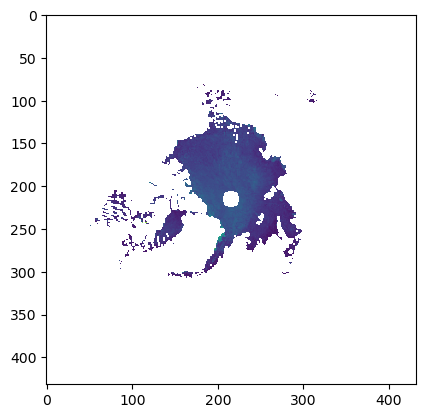

In [8]:
d = Dataset(f'../data/sit_data/month/2024/awi-siral-l3c-sithick-cryosat2-rep-nh_25km_ease2-202404-fv2p6.nc')
sit = np.array(d['sea_ice_thickness'][0])
sitlon = np.array(d['lon'])
sitlat = np.array(d['lat'])
sit[sitlat>88]=np.nan
plt.imshow(sit)

In [9]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable


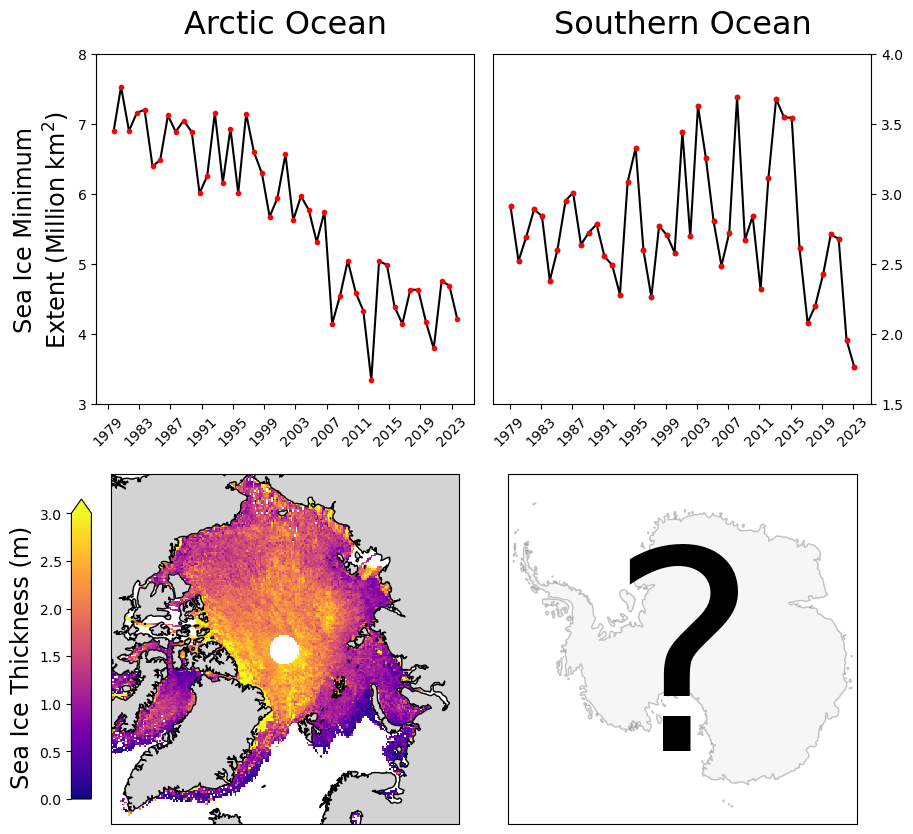

In [20]:
linecolor='k'
titlepad=15
titlefontsize=23

fig,axs = plt.subplots(2,2,figsize=(10,10))

ax1,ax2,ax3,ax4 = axs.reshape(-1)

ax2.plot(aa_min_dates[1:-1],aa_mins[1:-1],label='Antarctic Min',color=linecolor,marker='.')
ax2.scatter(aa_min_dates[1:-1],aa_mins[1:-1],label='Arctic Min',color='r',marker='.',zorder=10)
# ax2.plot(aa_max_dates[1:-1],aa_maxs[1:-1],label='Antarctic Max',color=linecolor,marker='.')
ax2.yaxis.tick_right()

ax1.plot(ao_min_dates[1:-1],ao_mins[1:-1],label='Arctic Min',color=linecolor)
ax1.scatter(ao_min_dates[1:-1],ao_mins[1:-1],label='Arctic Min',color='r',marker='.',zorder=10)
# ax1.plot(ao_max_dates[1:-1],ao_maxs[1:-1],label='Arctic Max',color=linecolor,marker='.')

ax1.set_ylabel('Sea Ice Minimum\nExtent (Million km$^2$)',fontsize='xx-large')

ax2.set_title('Southern Ocean',fontsize=titlefontsize,pad=titlepad)
ax1.set_title('Arctic Ocean',fontsize=titlefontsize,pad=titlepad)
ax1.set_yticks(np.arange(3,9))
ax2.set_yticks(np.arange(1.5,4.1,0.5))

for ax in [ax1,ax2]:
    ax.set_xticks([datetime.date(yr,1,1) for yr in np.arange(1979,2024)][::4],np.arange(1979,2024,4),rotation=45)
    

ax3.remove()

ax3 = fig.add_subplot(2,2,3,projection=ccrs.NorthPolarStereo())
ax3.set_extent([-180, 180, 90, 66], ccrs.PlateCarree())
ax3.add_feature(cartopy.feature.LAND, edgecolor='None',zorder=0,color='lightgrey')
ax3.coastlines(resolution='50m',zorder=10)
# ax3.add_feature(cartopy.feature.BORDERS, edgecolor='black',zorder=10)
cm = ax3.pcolormesh(sitlon,sitlat,sit,
              transform=ccrs.PlateCarree(),cmap='plasma',vmin=0,vmax=3)


cax = plt.axes((0.1,#left_inset
                0.135,#up_inset
                0.02,#width
                0.3,#height
               ))
cb = plt.colorbar(cm,cax=cax,location='left',extend='max')
cb.set_label('Sea Ice Thickness (m)',fontsize='xx-large')
# cb.ticklabelposition('left')

ax4.remove()

ax4 = fig.add_subplot(2,2,4,projection=ccrs.SouthPolarStereo(central_longitude=0))
ax4.set_extent([-180, 180, -90, -65], ccrs.PlateCarree())
ax4.add_feature(cartopy.feature.LAND, edgecolor='None',color='lightgrey',alpha=0.2,zorder=1)
ax4.coastlines(resolution='50m',zorder=1,alpha=0.2)

ax4.annotate('?',fontsize=200,xy=(0.5,0.43),xycoords='axes fraction',va='center',ha='center',zorder=5)
ax4.set_xticks([])
ax4.set_yticks([])

for key,spine in ax.spines.items():
    spine.set_zorder(100)

plt.subplots_adjust(wspace=0.05)

plt.savefig('../figures/figure_1.png',dpi=600,bbox_inches='tight')
ddir = '/home/robbie/Dropbox/Apps/Overleaf/ISSI_Perspective/figures/'
plt.savefig(f'{ddir}figure_1.png',dpi=600,bbox_inches='tight')